In [1]:
import networkx as nx
import centrality_utils as cu
import scipy.io
import mat73
import nbtw

from matplotlib import pyplot as plt
from scipy import sparse

In [2]:
Data    = scipy.io.loadmat('GD96_c.mat')
A       = Data['Problem']['A']

In [3]:
type(A)

numpy.ndarray

In [4]:
A       = sparse.csr_matrix(A.any())

In [5]:
G0      = nx.Graph(A)

In [6]:
CA = cu.CentralityAttributes(A, G0)

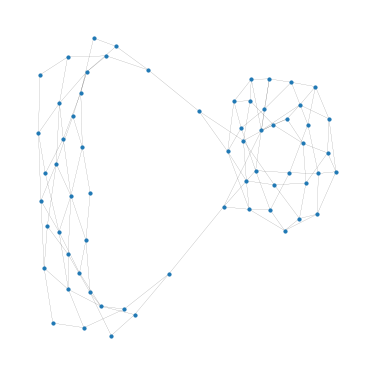

In [7]:
fig0 = plt.figure(figsize=(5,5))
nx.draw(CA.Graph, node_size=10, width=0.1) #with_labels=True,
plt.savefig("GD96_init.jpg", format="jpg", bbox_inches="tight")

In [8]:
KatzNX, alpha_grid = cu.KatzCentralityNX(CA.AdjacencyMatrix, CA.Graph)

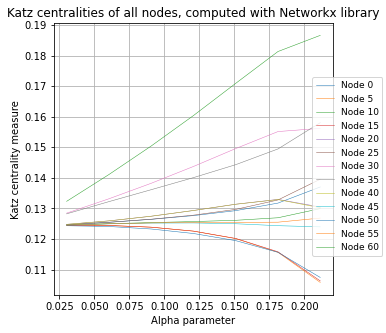

In [9]:
cu.VisualizeNodeCentrality(KatzNX,
                           alpha_grid,
                           "Katz centralities of all nodes, computed with Networkx library",
                           "Alpha parameter",
                           "Katz centrality measure",
                           step=5)

In [10]:
KatzV2, alpha_gridV2 = cu.KatzCentralityV2(CA.AdjacencyMatrix, CA.Graph)

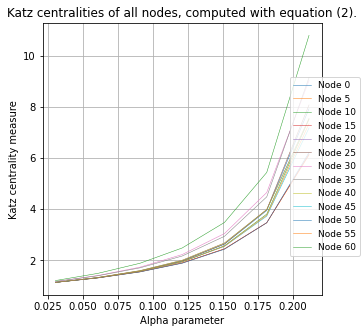

In [11]:
cu.VisualizeNodeCentrality(KatzV2,
                           alpha_gridV2,
                           "Katz centralities of all nodes, computed with equation (2).",
                           "Alpha parameter",
                           "Katz centrality measure", 
                           step=5,
                           filename="katz_vs_alp2.jpg")

In [12]:
NBTcent, grid_t = cu.NBTCentrality(CA.AdjacencyMatrix)

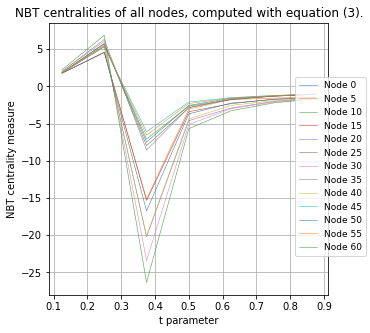

In [13]:
cu.VisualizeNodeCentrality(NBTcent,
                           grid_t,
                           "NBT centralities of all nodes, computed with equation (3).",
                           "t parameter",
                           "NBT centrality measure",
                           step=5,
                           filename="nbt_vs_t2.jpg")

In [14]:
nbt_walks = nbtw.nbtw(CA.AdjacencyMatrix.toarray(), 12)
"""for i in range(nbt_walks.shape[0]):
    for j in range(nbt_walks.shape[1]):
        print(f"[{i,j}]", nbt_walks[i, j])"""

'for i in range(nbt_walks.shape[0]):\n    for j in range(nbt_walks.shape[1]):\n        print(f"[{i,j}]", nbt_walks[i, j])'

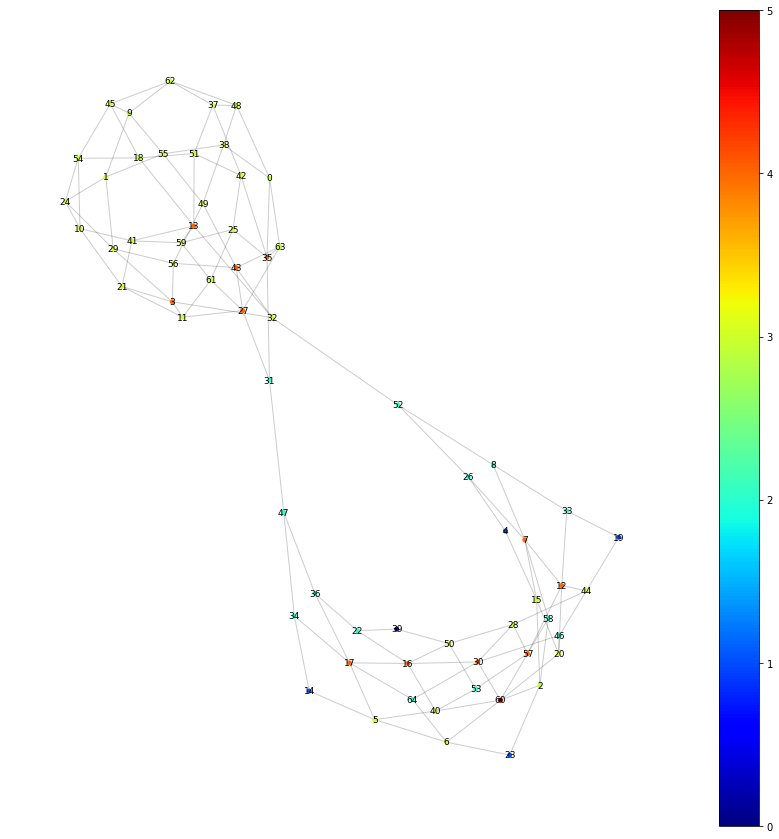

[1.06750082 1.09564205 1.12378327 1.1519245  1.18006572 1.20820694]


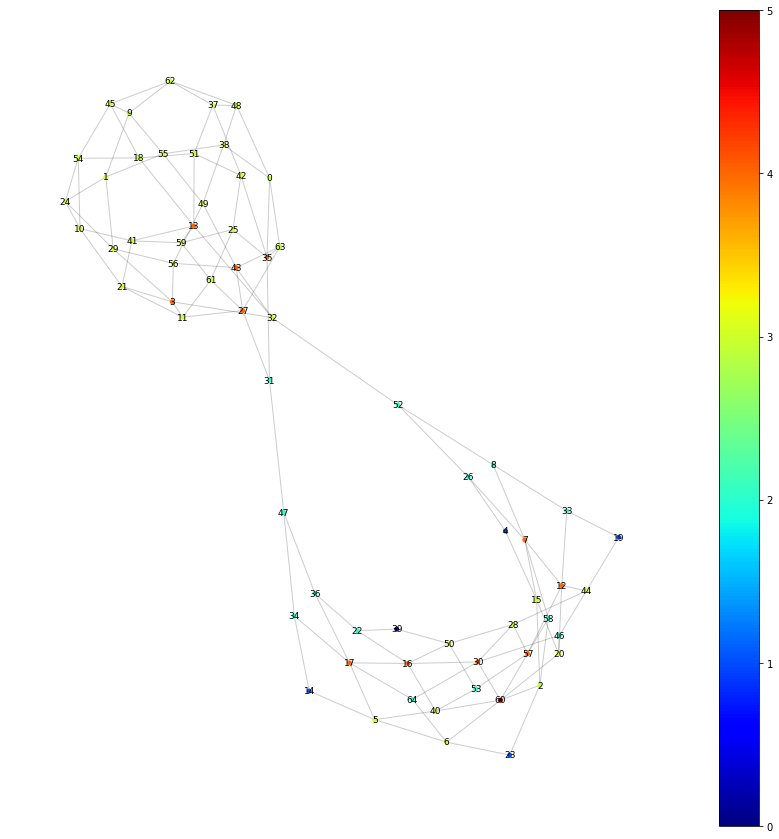

[1.15323059 1.22034803 1.28746548 1.35458292 1.42170037 1.48881781]


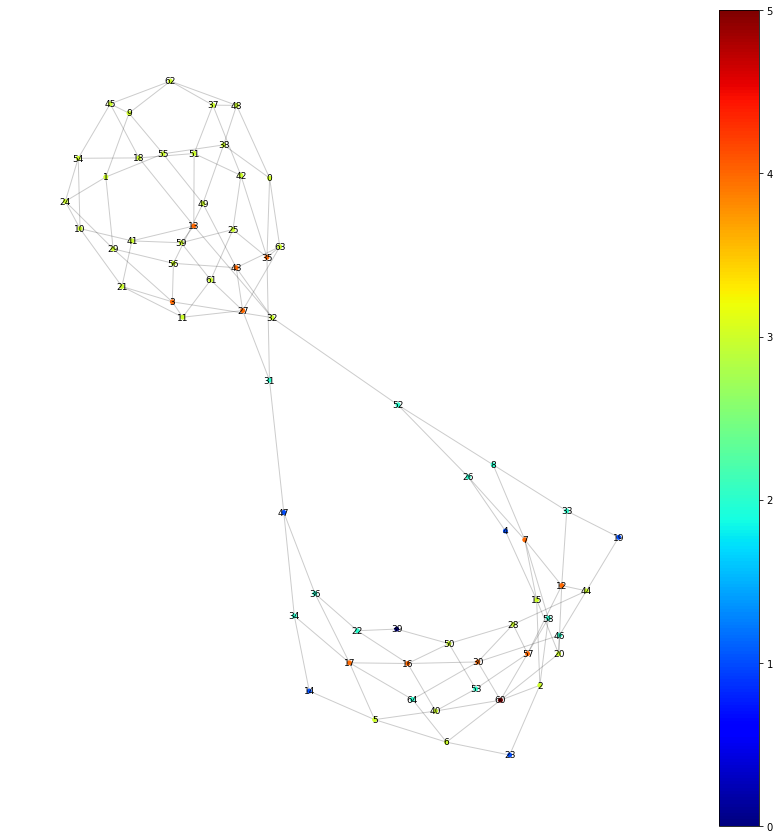

[1.26650191 1.3903007  1.51409949 1.63789828 1.76169708 1.88549587]


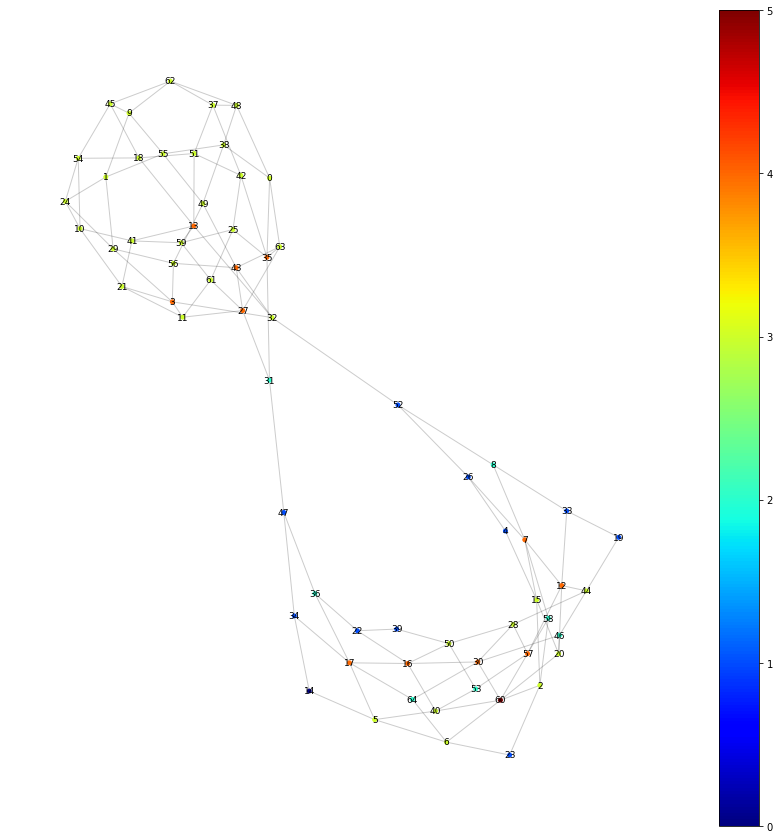

[1.42475733 1.63673831 1.8487193  2.06070029 2.27268128 2.48466227]


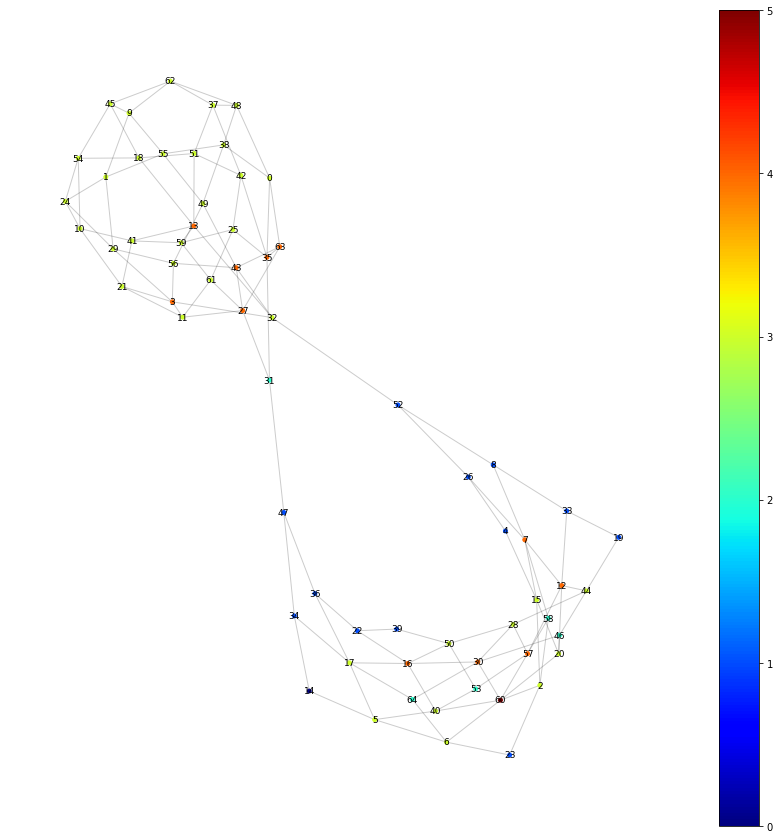

[1.66502199 2.0286183  2.39221461 2.75581092 3.11940723 3.48300353]


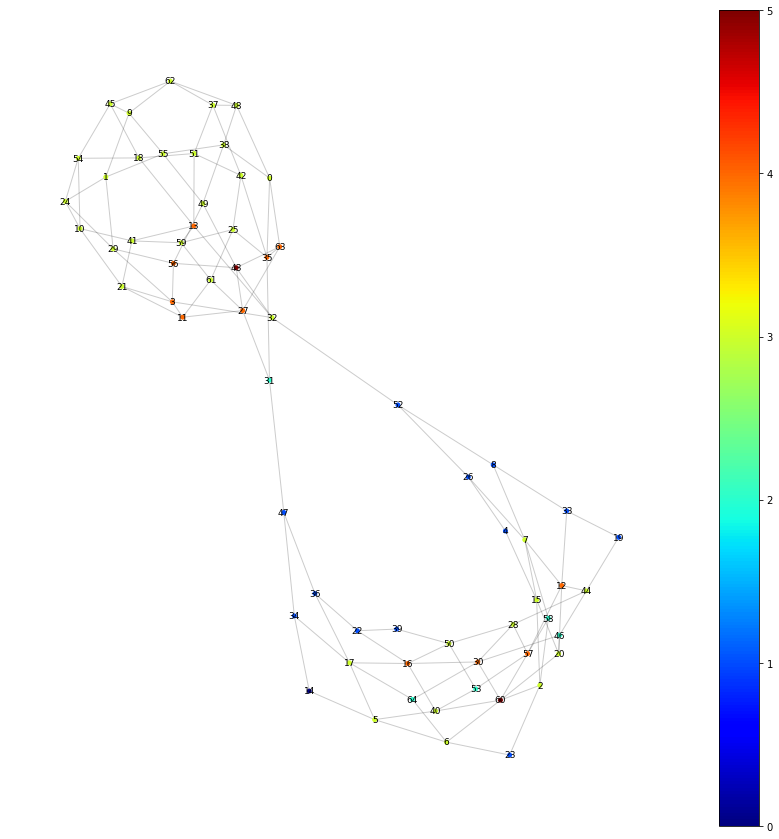

[2.08972271 2.7598084  3.42989409 4.09997978 4.77006547 5.44015115]


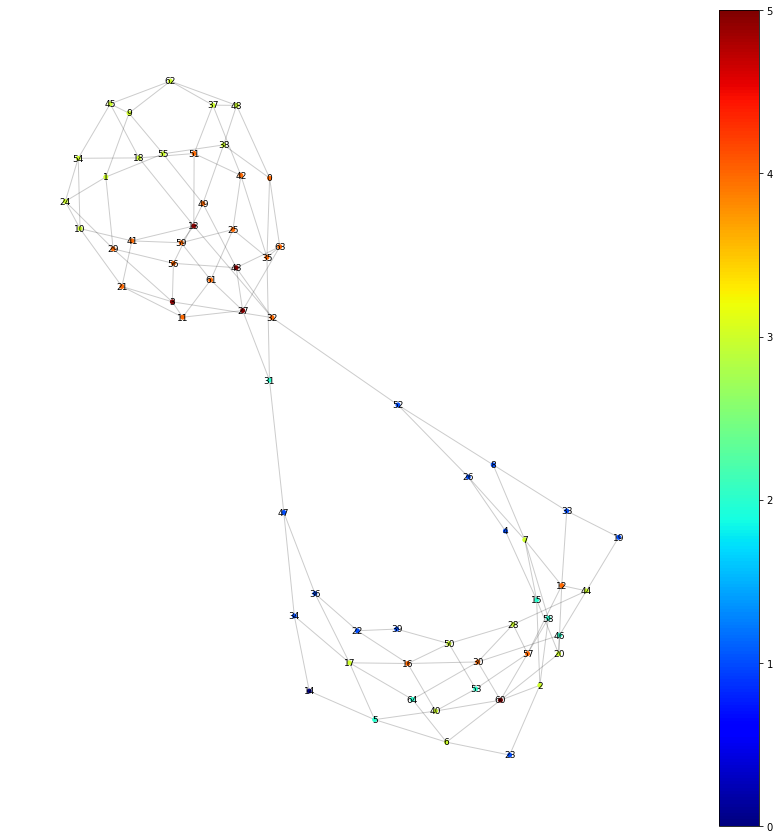

[ 3.13445676  4.66841439  6.20237203  7.73632966  9.27028729 10.80424493]


In [15]:
cu.DisplayCentralitiesInGraph(KatzV2, CA.Graph)

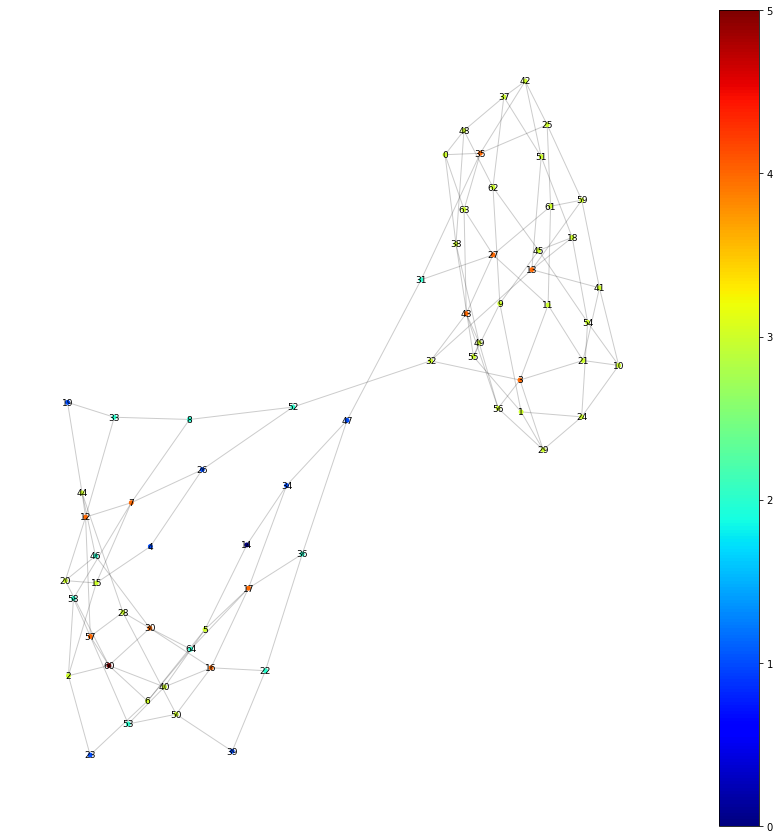

[1.3765218  1.54638872 1.71625565 1.88612257 2.0559895  2.22585642]


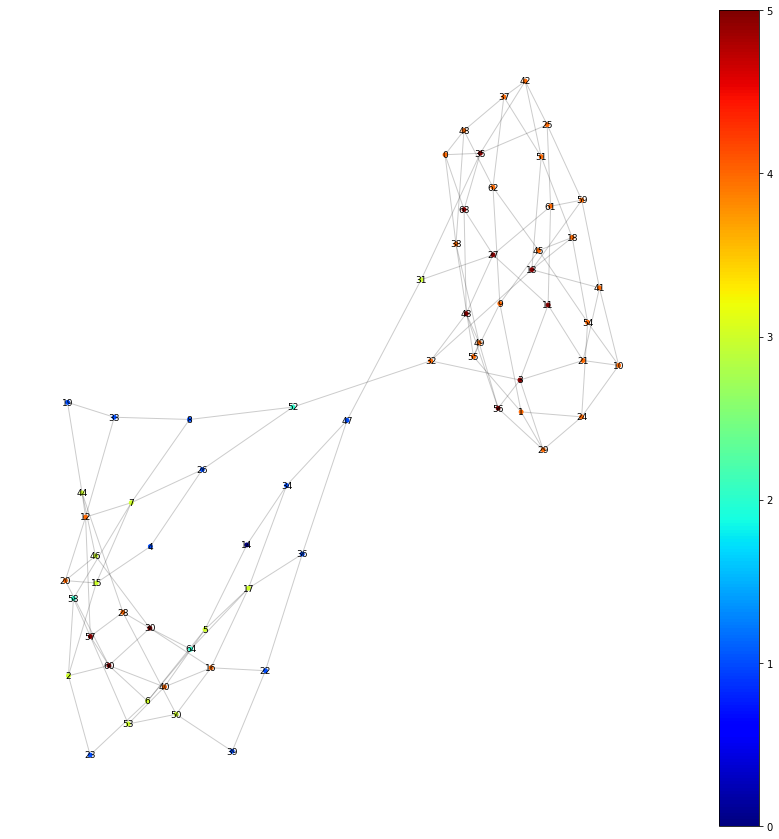

[2.72125526 3.54636683 4.37147839 5.19658995 6.02170151 6.84681307]


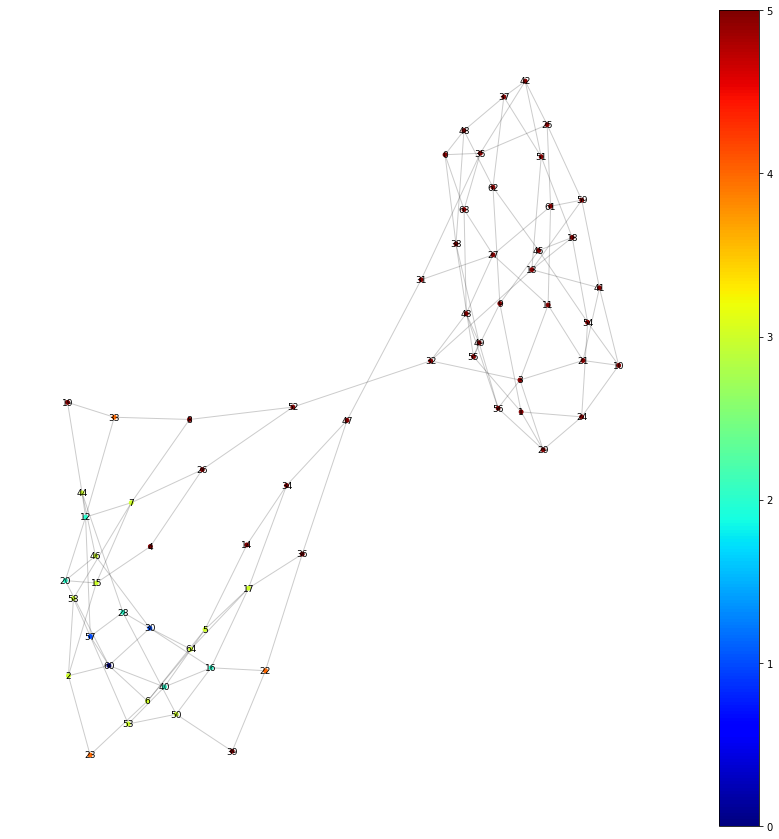

[-26.34714063 -22.26195958 -18.17677854 -14.0915975  -10.00641645
  -5.92123541]


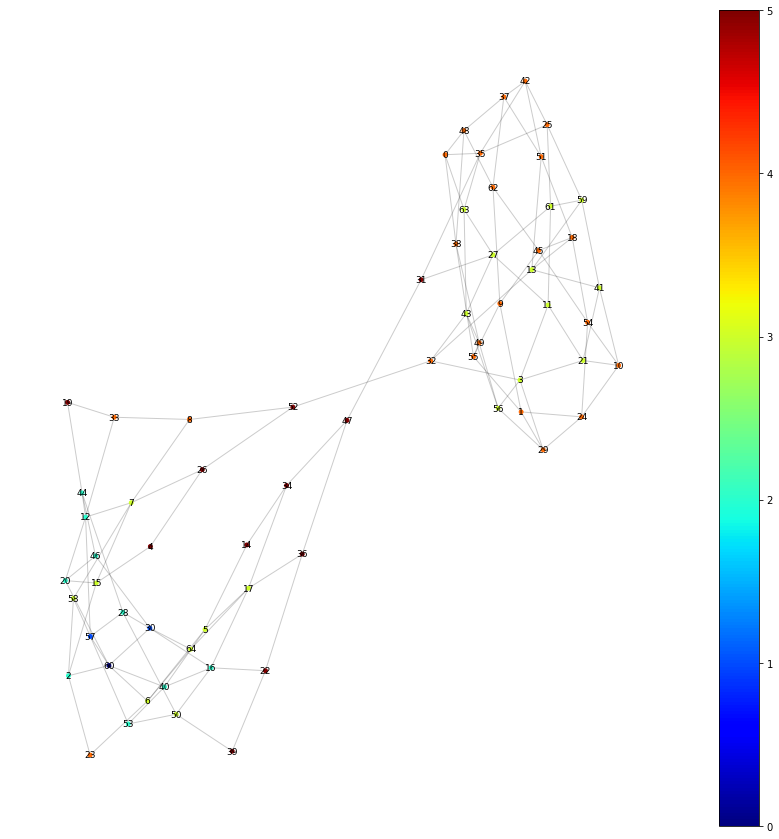

[-5.68785284 -4.75215562 -3.81645841 -2.88076119 -1.94506398 -1.00936676]


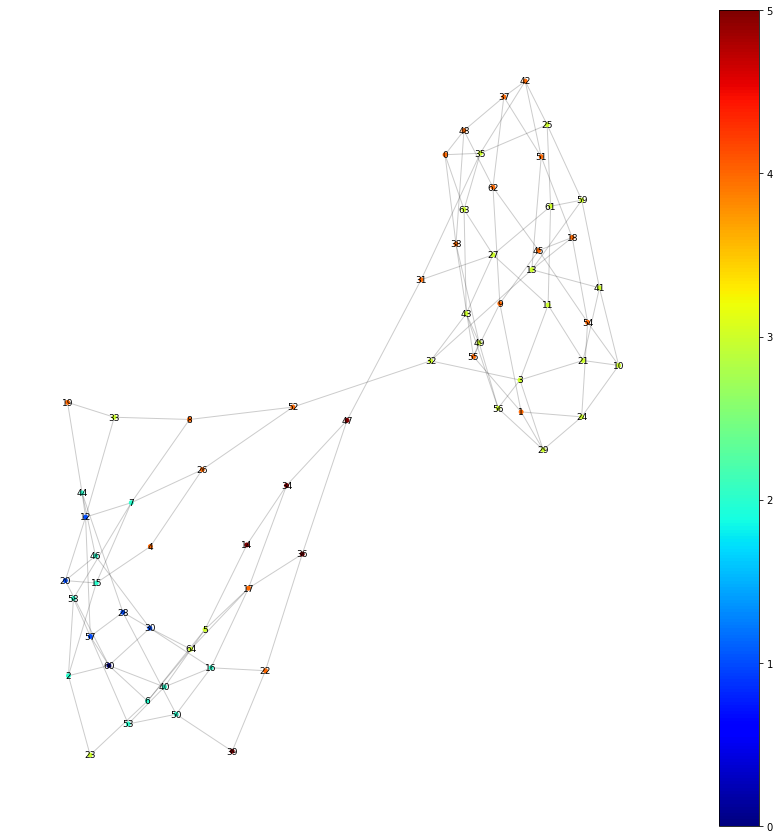

[-3.28043623 -2.74392764 -2.20741905 -1.67091046 -1.13440187 -0.59789328]


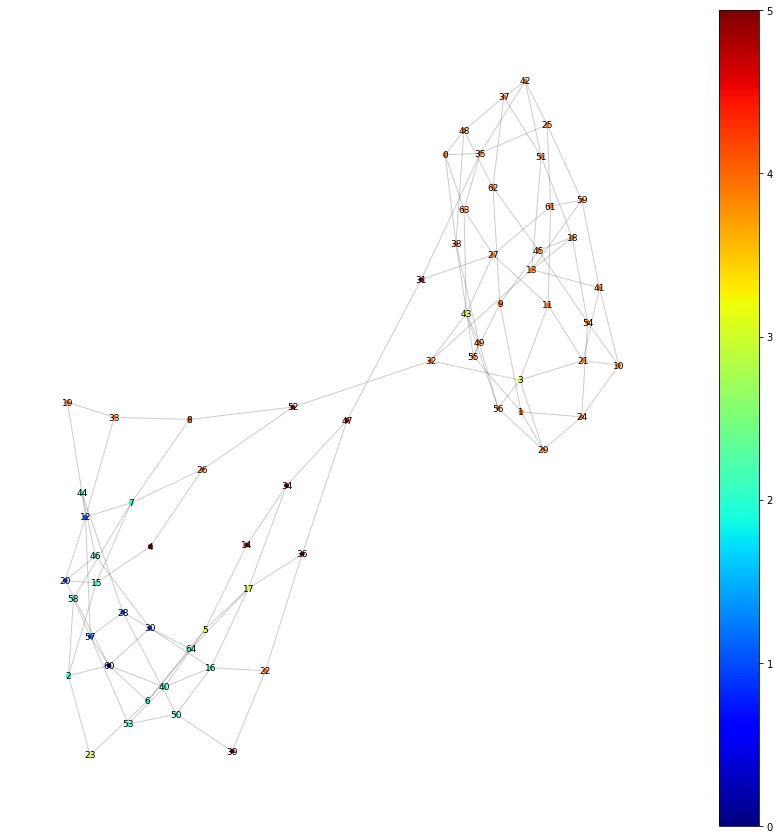

[-2.23149124 -1.97083734 -1.71018344 -1.44952953 -1.18887563 -0.92822173]


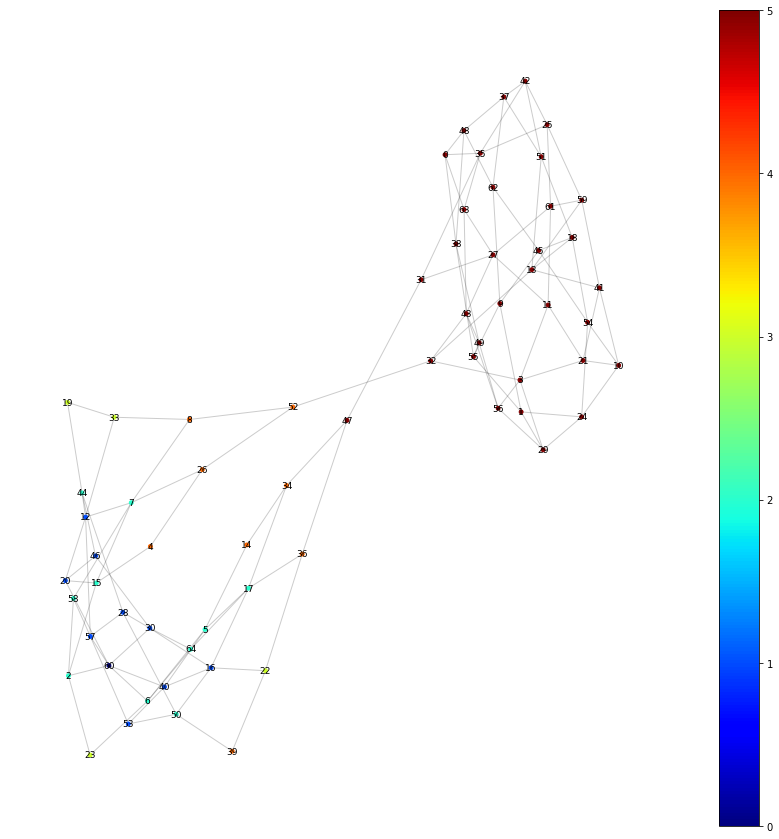

[-1.67505477 -1.54289645 -1.41073813 -1.27857981 -1.14642149 -1.01426317]


In [16]:
cu.DisplayCentralitiesInGraph(NBTcent, CA.Graph)